# Plot Downloaded Stream Gauge Data
Here, provide the data file you downloaded. The script will load the data in an plot the discharge
We can also perform some statistics such as the mean and maximum during the time frame

In [1]:
# Load needed packages
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Below you must specify the file you would like to load. Make sure this file is in the same folder as this script, othwerwise you should provide the full file path

In [2]:
# Provide the filename of the downloaded data, 
# use the full path if the script is not in the same folder!
filename = '12213100_Daily.txt'

In [3]:
# Read in the data for pandas
#pd is pandas (library), sep is the seperator (delimiter) \t is tab,
#comment is #, one headerline, use the columns 2 and 3 (first column is 0).
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d') 
data = pd.read_csv(filename,
                   sep= '\t', 
                   comment = '#',
                   header = 1,
                   engine = 'python',
                   usecols = [2,3],
                   names = ('date','discharge'),
                   parse_dates = ['date'], 
                   date_parser = dateparse
                   )

t = data['date'].values
Q = data['discharge'].values

(array([17440., 17532., 17622., 17713., 17805., 17897., 17987., 18078.,
        18170.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

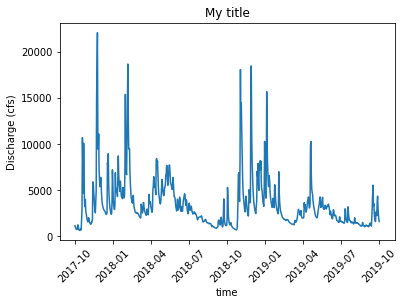

In [6]:
# Plot the discharge
plt.plot(t,Q)
plt.xlabel('time')
plt.ylabel('Discharge (cfs)')
plt.title('My title')
plt.xticks(rotation=45)

In [7]:
# Compute some statistics, mean and max
Q_mean = np.mean(Q)
Q_max = np.max(Q)
print('Mean = {:4.2f}, Max = {:4.2f}'.format(Q_mean, Q_max))

Mean = 3479.47, Max = 22100.00


(array([17440., 17532., 17622., 17713., 17805., 17897., 17987., 18078.,
        18170.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

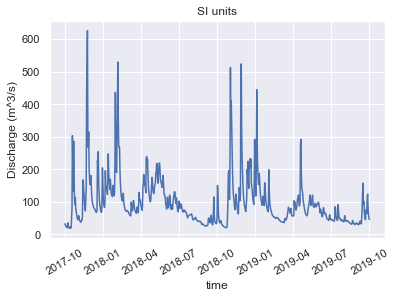

In [8]:
# Plot the discharge, in cubic meters / s
# Let's also use seaborn to make it look a little nicer
import seaborn as sns
sns.set()
Q_m = Q*0.0283168
plt.plot(t,Q_m)
plt.xlabel('time')
plt.ylabel('Discharge (m^3/s)')
plt.title('SI units')
plt.xticks(rotation=30)

In [9]:
# Compute the statistics now in SI units.
Q_mean = np.mean(Q_m)
Q_max = np.max(Q_m)
print('Mean = {:4.2f}, Max = {:4.2f}'.format(Q_mean, Q_max))

Mean = 98.53, Max = 625.80
